Tarea Distribucion Normal

In [ ]:
#importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns


In [ ]:
#importamos la base de datos
from google.colab import files
uploaded = files.upload()

Saving Dataset Gaussiana.xlsx to Dataset Gaussiana.xlsx


In [ ]:
datos = pd.read_excel('Dataset Gaussiana.xlsx')
datos.head()

,Fecha,Retorno Diario,Rendimiento Acumulado,Volatilidad Anualizada,VaR 95%,VaR 99% ($),Indicador de Crisis
0,2020-01-01,1.356983,1.356983,21.560658,3.028579e+07,-2.207171e+07,1
1,2020-01-02,1.864960,3.221943,21.539078,3.151624e+07,1.735269e+07,0
2,2020-01-03,0.809421,4.031364,21.531111,-1.233717e+07,-1.360755e+07,0
3,2020-01-04,-1.473143,2.558221,21.716106,1.274235e+07,-2.590021e+06,1
4,2020-01-05,-2.193350,0.364871,21.673948,2.230812e+07,-7.955869e+06,1


In [ ]:
#inspeccionamos columnas
datos.columns

Index(['Fecha', 'Retorno Diario ', 'Rendimiento Acumulado ',
       'Volatilidad Anualizada ', 'VaR 95% ', 'VaR 99% ($)',
       'Indicador de Crisis'],
      dtype='object')

In [ ]:
#Eliminar espacios extra en los nombres de las columnas
datos.columns = datos.columns.str.strip()

In [ ]:
#Extraer el retorno diario
retornos = datos["Retorno Diario"].dropna()

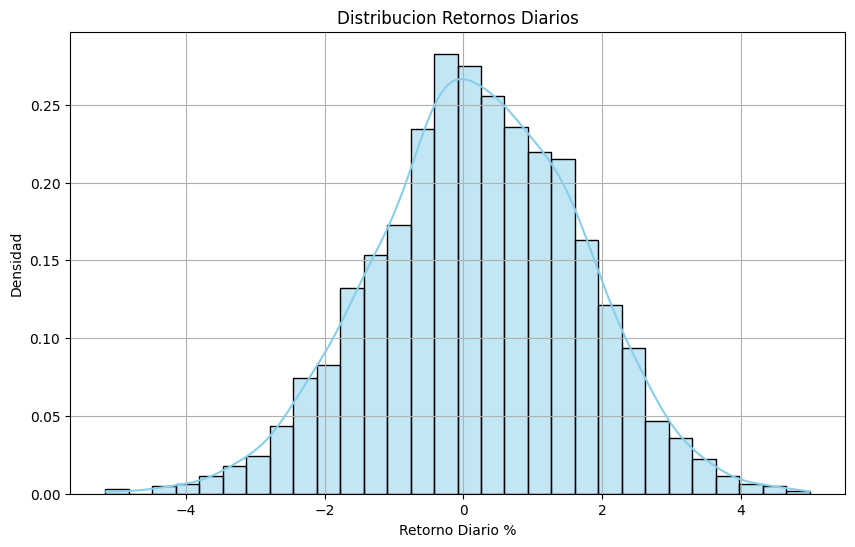

In [ ]:
#Histograma y KDE
plt.figure(figsize=(10, 6))
sns.histplot(retornos, kde=True, bins=30, stat="density", color='skyblue')
plt.title("Distribucion Retornos Diarios")
plt.xlabel("Retorno Diario %")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()

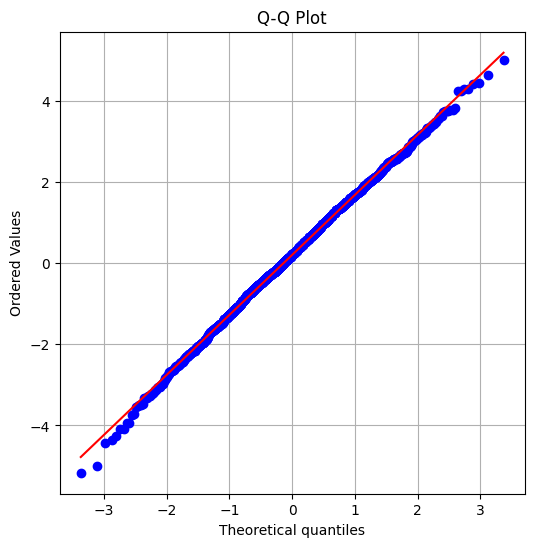

In [ ]:
#Grafico Q-Q
plt.figure(figsize=(6, 6))
stats.probplot(retornos, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()

In [ ]:
# Calcular la media y desviación estándar observadas
media_observada = retornos.mean()
desviacion_observada = retornos.std()

# Valores teóricos dados en el documento en %
media_teorica = 0.2
desviacion_teorica = 1.5

# Prueba de hipótesis para la media
t_stat, p_value_media = stats.ttest_1samp(retornos, media_teorica)

# Prueba de varianza (F-test)
varianza_teorica = desviacion_teorica ** 2
varianza_observada = desviacion_observada ** 2
f_stat = varianza_observada / varianza_teorica
p_value_varianza = 1 - stats.f.cdf(f_stat, len(retornos) - 1, len(retornos) - 1)

# Mostrar resultados
(media_observada, desviacion_observada, p_value_media, p_value_varianza)


(0.20358979385503845,
 1.4776515725827775,
 0.9173073343906908,
 0.739351824633275)

In [ ]:
# Cálculo de la probabilidad de una pérdida mayor al 2%
umbral_perdida = -0.02  # -2%

# Usando la distribución normal teórica
prob_perdida_mayor_2 = stats.norm.cdf(umbral_perdida, loc=.002, scale= .015)

# Mostrar resultado
prob_perdida_mayor_2

0.07123337741398612

In [ ]:
# Determinar la volatilidad requerida para que la probabilidad de pérdida mayor al 2% sea < 1%
target_prob = 0.01  # Probabilidad objetivo
z_score = stats.norm.ppf(target_prob)  # Valor z correspondiente a la probabilidad objetivo

# Despejamos sigma de la ecuación P(X < -0.02) = 0.01
sigma_new = (-0.02 - .002) / z_score
print(sigma_new)

0.009456883145247851


In [ ]:
from scipy.stats import skew, kurtosis

# Calcular sesgo y curtosis de los rendimientos diarios
sesgo = skew(retornos)
curtosis_valor = kurtosis(retornos, fisher=True)  # Fisher=True da curtosis en exceso

print(sesgo, curtosis_valor)

-0.10534361851929021 0.04532132807711253


In [ ]:
# Simulación de la inclusión de un activo con baja correlación
mu_nuevo = 0.0015  # 0.15% de retorno esperado diario
sigma_nuevo = 0.007  # 0.7% de volatilidad diaria
correlacion = 0.2  # Baja correlación con el activo original

# Asignación de pesos en el portafolio (50%-50%)
w1, w2 = 0.5, 0.5

# Cálculo del nuevo retorno esperado y volatilidad
mu_portafolio = w1 * .002 + w2 * mu_nuevo
sigma_portafolio = np.sqrt(
    (w1**2 * .015**2) + (w2**2 * sigma_nuevo**2) + (2 * w1 * w2 * correlacion * .015 * sigma_nuevo)
)

print(mu_portafolio, sigma_portafolio)

0.00175 0.008888194417315589


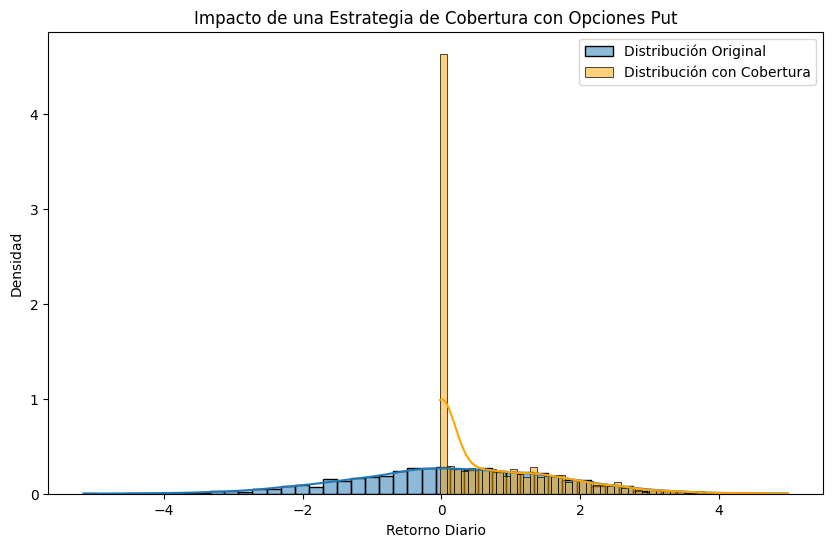

In [ ]:
# Aplicamos un piso a las pérdidas en -2%, simulando la protección de una opción put
retornos_cubiertos = np.clip(retornos, a_min=-0.02, a_max=None)

# Graficar la distribución antes y después de la cobertura
plt.figure(figsize=(10,6))
sns.histplot(retornos, bins=50, kde=True, stat="density", label="Distribución Original")
sns.histplot(retornos_cubiertos, bins=50, kde=True, stat="density", label="Distribución con Cobertura", color="orange")

plt.xlabel("Retorno Diario")
plt.ylabel("Densidad")
plt.title("Impacto de una Estrategia de Cobertura con Opciones Put")
plt.legend()
plt.show()